# Red Wine Quality Classification by RandomForestClassifier and SVM

Dataset from : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?datasetId=4458&searchQuery=EDA

## part 1. Identify a Supervised Machine Learning Problem

In this study, there are 11 input variables for the red wine quality prediction. Next step, I will rate the quality of the wine as good or bad based on the threshold. Compare the accuracy of the model by the result from training data.
Classifying the quality through the model can greatly reduce the cost and time of manual classification, and the model trained with big data will surpass humans in accuracy of classification. 

### Input variables (based on physicochemical tests):

1.  **fixed acidity**

2.  **volatile acidity**

3.  **citric acid**

4.  **residual sugar**

5.  **chlorides**

6.  **free sulfur dioxide**

7.  **total sulfur dioxide**

8.  **density**

9.  **pH**

10.  **sulphates**

11.  **alcohol**

### Output variable (based on sensory data):

12.  **quality (score between 0 and 10)**

## part 2. EDA

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
# winequality-red.csv
def dataload(path):
    df = pd.read_csv(path, delimiter=",")
    return df


In [12]:
df = dataload("data/winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Now check the null values

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Plot the heatmap, pairplot and hist plot

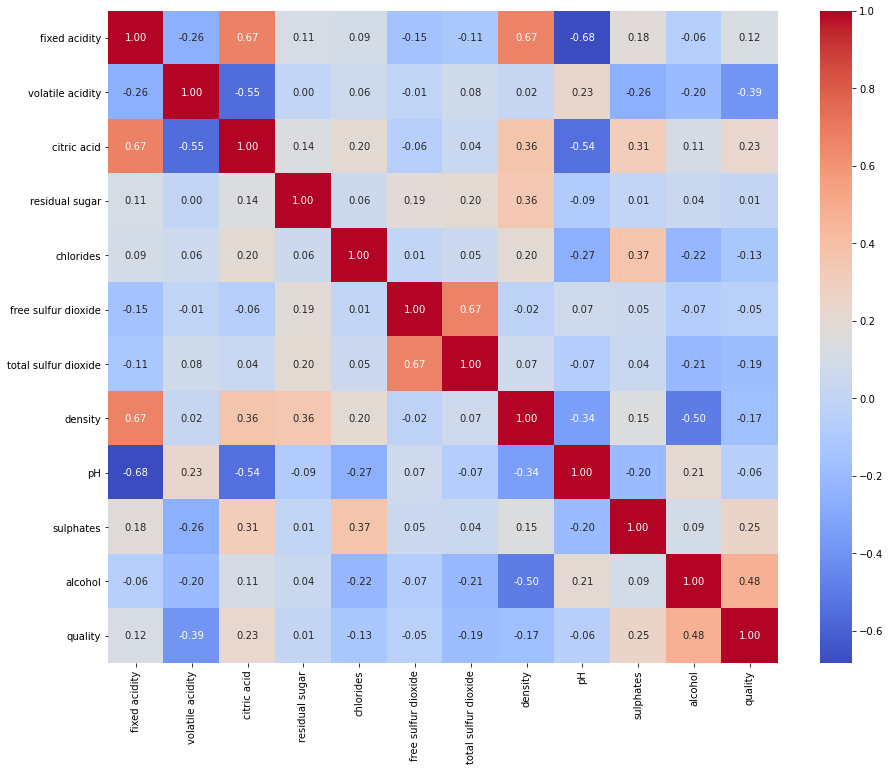

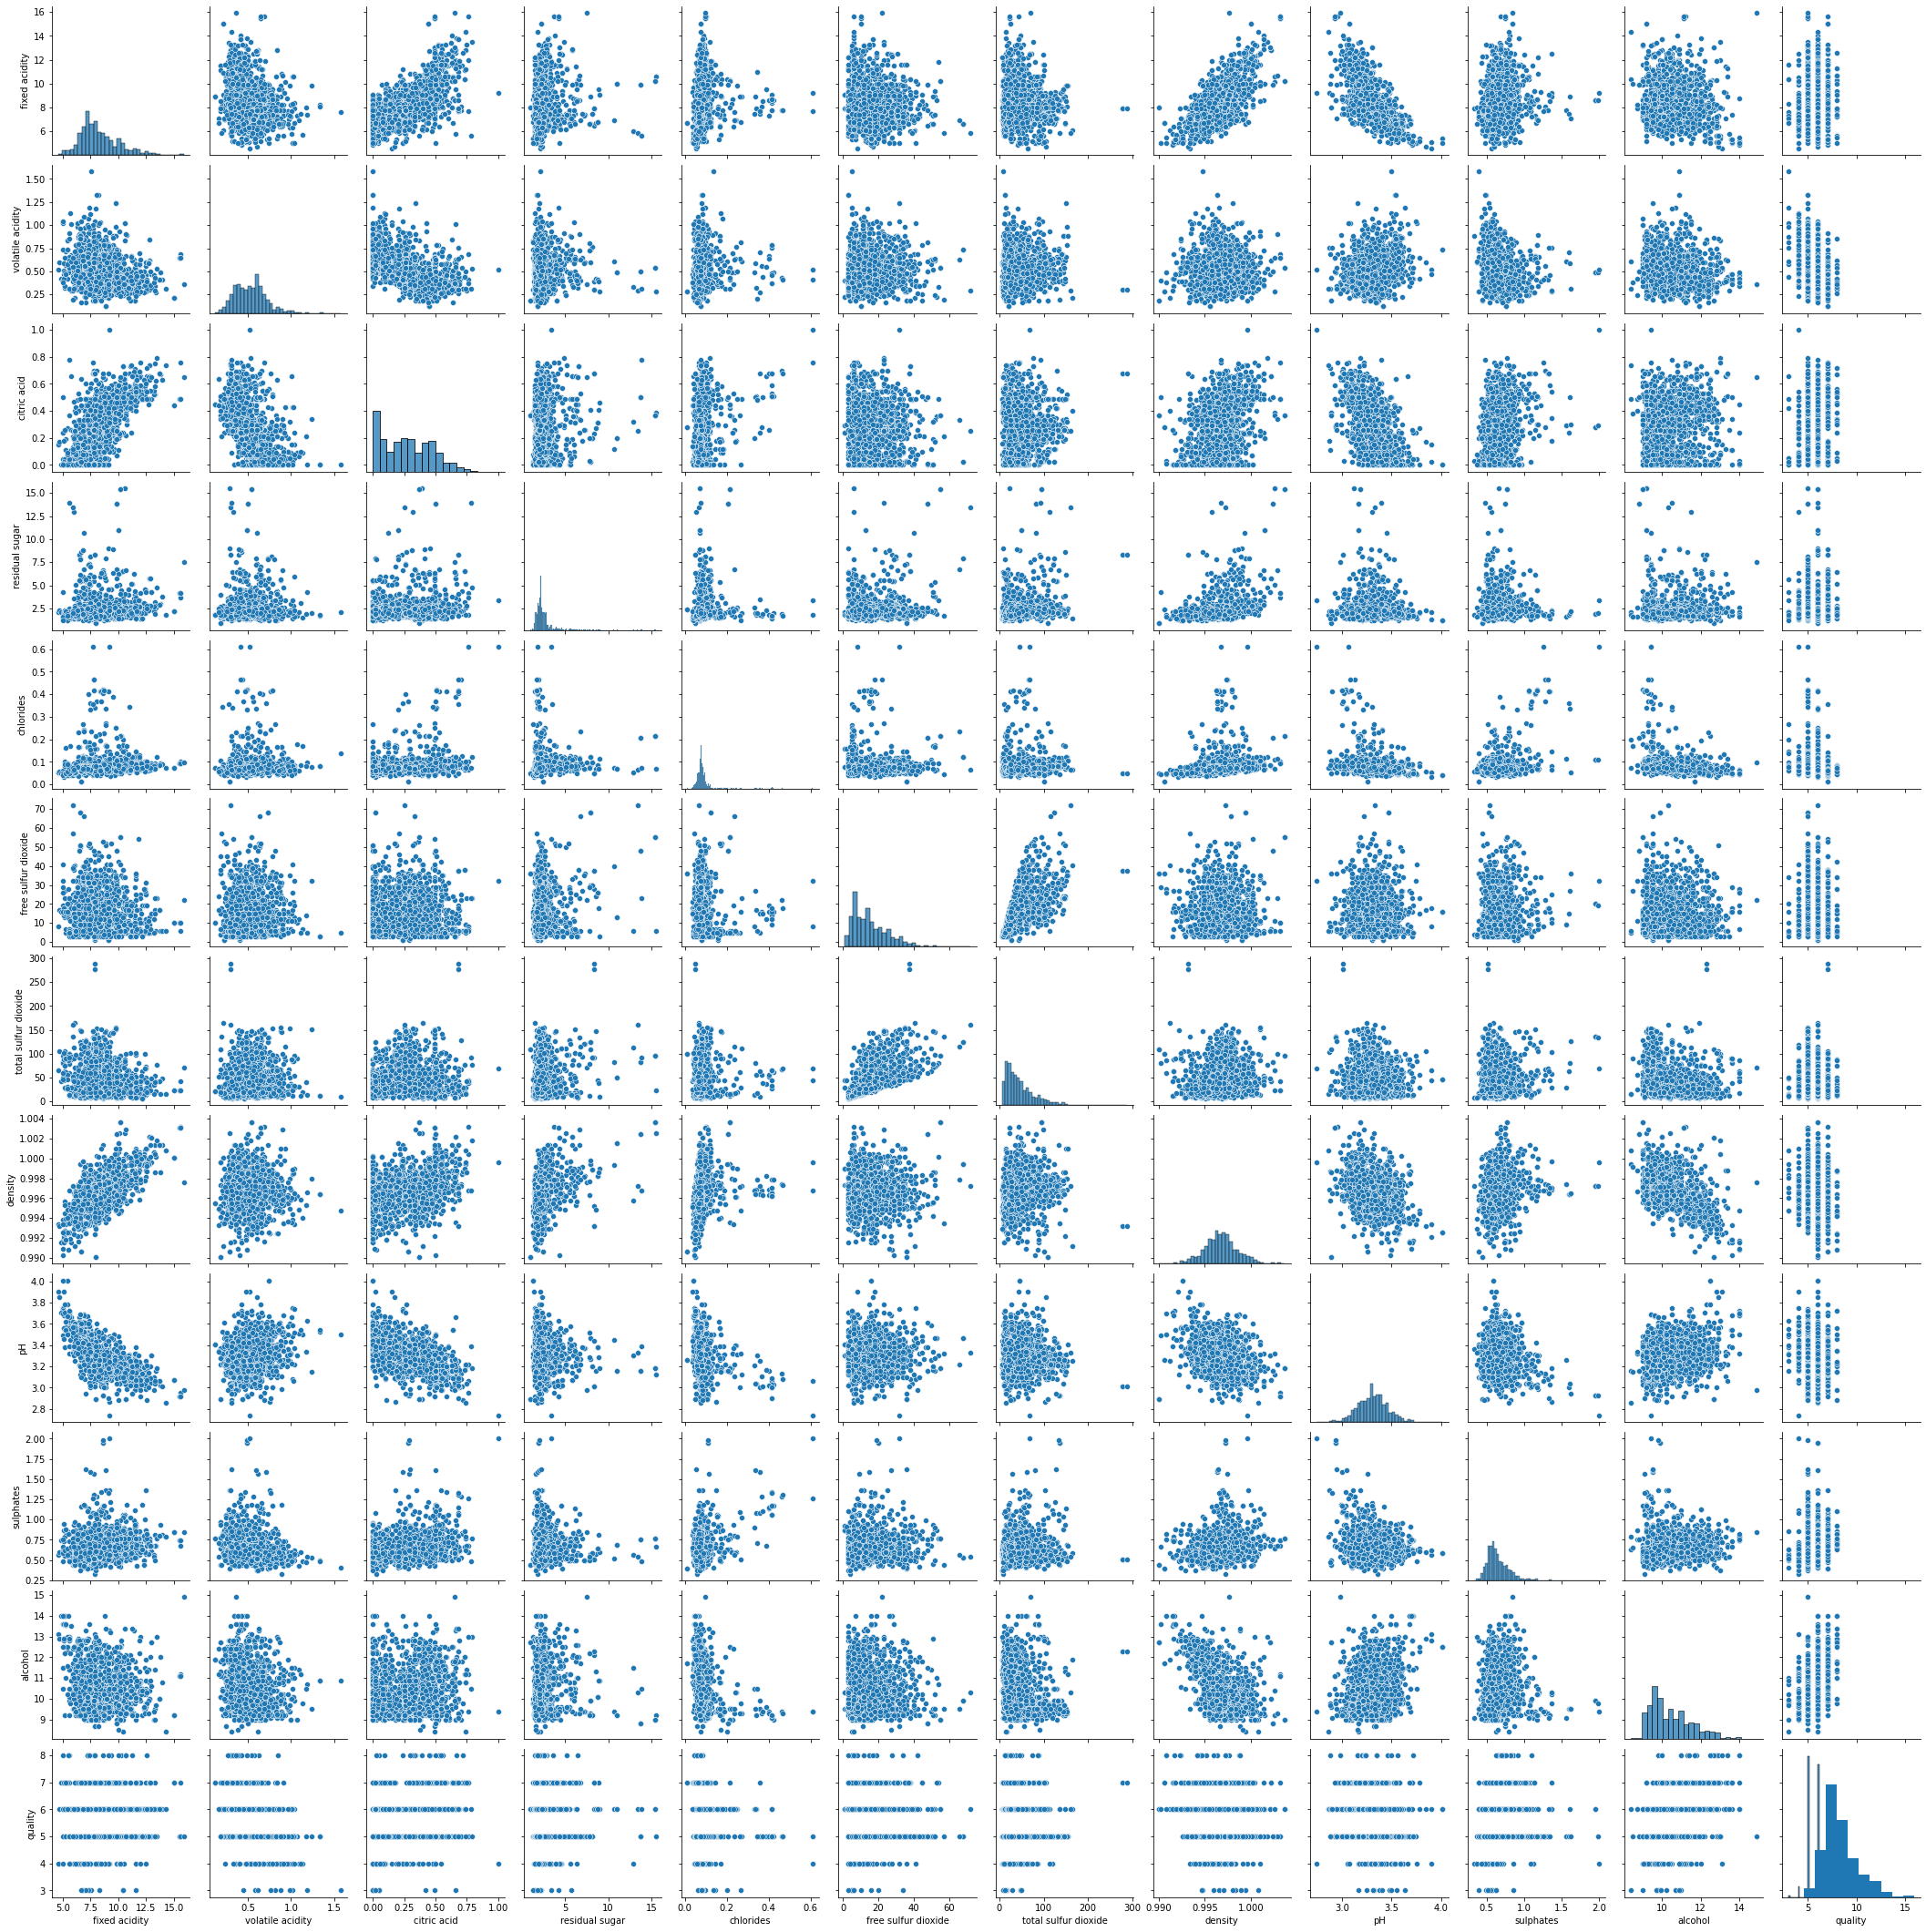

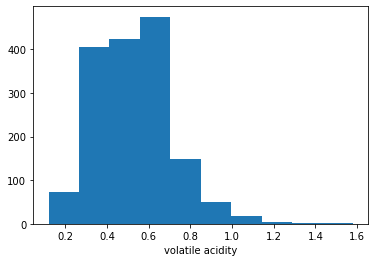

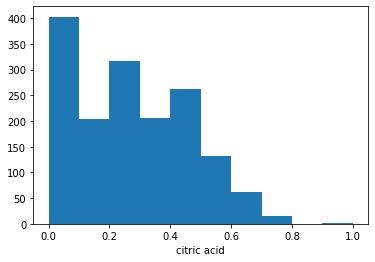

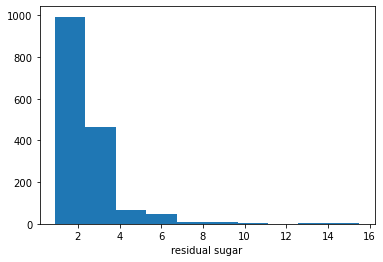

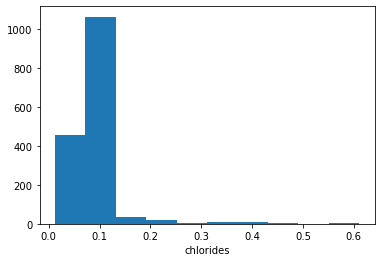

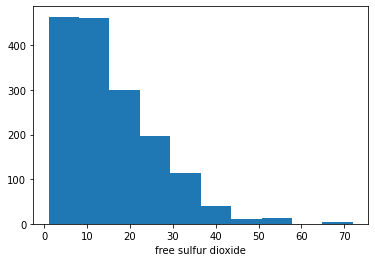

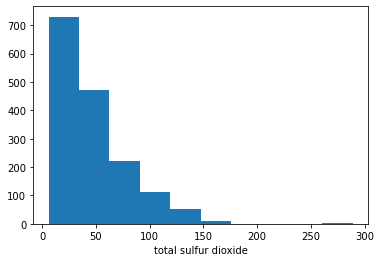

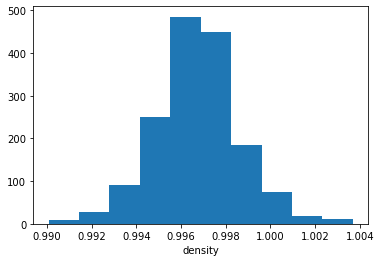

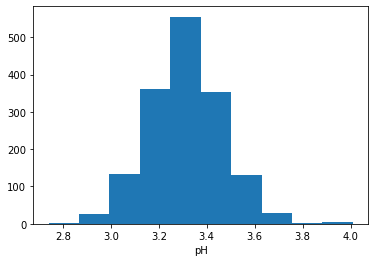

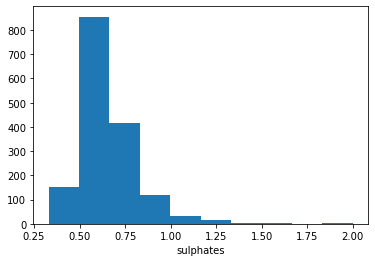

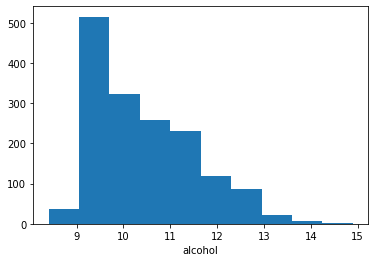

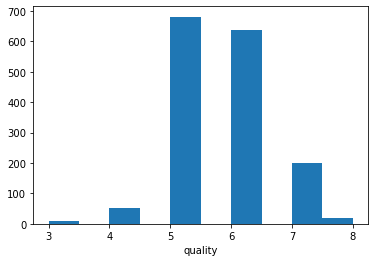

In [62]:
corr = df.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()
ax = sns.pairplot(df)

for c in df.columns:
    plt.hist(df[c])
    plt.xlabel(c)
    plt.show()

#### From the pairplot,I think dataset not so much linearly dependent, so I choose to classify the wine to Good or Bad

#### I choose mean of quility for bins to classify data to Good(1) and Bad(0)


In [52]:

X = df.drop('quality', axis = 1).values
y = pd.cut(x = df['quality'], bins = (0,5.63,10), labels = [0,1]) #  >5.63 = 1 means quality is good 

print(y.value_counts())

1    855
0    744
Name: quality, dtype: int64


In [51]:
#split test in 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1212)

## Part 3. Perform Analysis  

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#### Use RandomForestClassifier and SVM to analysis this data

#### A. RandomForestClassifier

#### Use gird search to find the best parameter, I choose max_features and max_leaf_nodes to search


In [68]:
rf_params = {'max_features':[3,4,5,6,7,8,9,10],
             'max_leaf_nodes':[10,50,100,200,300,500]}
rf = RandomForestClassifier(criterion = 'gini')
grid = GridSearchCV(rf, param_grid=rf_params)
grid_search = grid.fit(X_train,y_train)

In [69]:

print(cross_val_score(grid_search, X_train, y_train, cv=3))

[0.81       0.8        0.78947368]


In [70]:
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_params_)

Best score: 0.816
{'max_features': 3, 'max_leaf_nodes': 300}


In [102]:
best_rf = grid_search.best_estimator_
rf_y_pred = best_rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_y_pred)
print("rf score:", rf_score)

rf score: 0.8025


In [93]:
confusion_matrix(y_test, rf_y_pred)

array([[148,  31],
       [ 48, 173]], dtype=int64)

#### SVM - kernel = linear

#### Use gird search to find the best parameter, I choose hyperparameter to search (range 2^0 to 2^5)

In [86]:
SVM_linear_params = {
    'C': [1, 2, 4, 8, 16, 32]}
svm_linear = SVC(kernel = 'linear')
#print(svm_linear.get_params().keys())
grid=GridSearchCV(svm_linear, param_grid=SVM_linear_params) # ToDo: replace it to proper GridSearchCV object and run the grid search with cross validation
grid_search = grid.fit(X_train,y_train)

In [87]:

print(cross_val_score(grid_search, X_train, y_train, cv=3))

[0.735      0.745      0.72932331]


In [88]:
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_params_)

Best score: 0.746
{'C': 8}


In [103]:
best_lsvm = grid_search.best_estimator_
lsvm_y_pred = best_lsvm.predict(X_test)
lsvm_score = accuracy_score(y_test, lsvm_y_pred)
print("lsvm score:", lsvm_score)

lsvm score: 0.725


In [95]:
confusion_matrix(y_test, lsvm_y_pred)

array([[131,  48],
       [ 62, 159]], dtype=int64)

#### SVM - kernel = rbf

#### Use gird search to find the best parameter , I choose hyperparameter and gamma to search (range 2^-1 to 2^5)

In [96]:
SVM_rbf_parms = {'C': [0.5, 1, 2, 4, 8, 16, 32]
              , 'gamma': [0.5, 1, 2, 4, 8, 16, 32]}
svm_rbf = SVC(kernel = 'rbf')

grid=GridSearchCV(svm_linear, param_grid=SVM_rbf_parms) # ToDo: replace it to proper GridSearchCV object and run the grid search with cross validation
grid_search = grid.fit(X_train,y_train)

In [97]:
print(cross_val_score(grid_search, X_train, y_train, cv=3))

[0.735      0.745      0.72932331]


In [98]:
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_params_)

Best score: 0.746
{'C': 8, 'gamma': 0.5}


In [106]:
best_rbfsvm = grid_search.best_estimator_
rbfsvm_y_pred = best_rbfsvm.predict(X_test)
rbfsvm_score = accuracy_score(y_test, rbfsvm_y_pred)
print("lsvm score:", rbfsvm_score)

lsvm score: 0.725


In [100]:
confusion_matrix(y_test, y_pred)

array([[131,  48],
       [ 62, 159]], dtype=int64)

In [111]:
models = [('RandomForestClassifier', rf_score),
          ('SVM - kernel = linear', lsvm_score),
          ('SVM - kernel = rbf', rbfsvm_score)]
result = pd.DataFrame(data = models, columns = ['Model', "score"])
result

,Model,score
0,RandomForestClassifier,0.8025
1,SVM - kernel = linear,0.7250
2,SVM - kernel = rbf,0.7250


#### Plot their score to `sns.barplot`

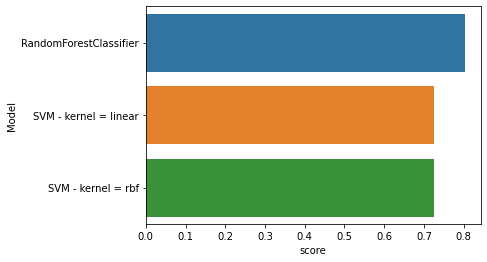

In [112]:
sns.barplot(x='score', y='Model', data = result)


plt.show()

### Part 4. Discussion and Conclusions 

Among my models, **RandomForestClassifie**r shows better accuracy for this dataset.
And two **SVM** Classifier not did well, I think reason is data too distributed, so when use **SVM** hard to choose a good **hyperparameter** to find the better **hyperplane**.

Before train, I use `GridSearchCV()` to find a best set parameters to fit the training data.For **RandomForestClassifier**, I choose `max_features` and `max_leaf_noods` to exhaustive search, and **SVM** choose the **hyperparameter** to search in `2^0 to 2^5` range. As the result of gridsearch, **RandomForestClassifier** best parameter is `'max_features': 3, 'max_leaf_nodes': 300`, and its score is `0.816`, and predict test data score is `0.8025`, not much worse. So I think gridsearch is effective.

In gridsearch state,  **RandomForestClassifier** also do better than two **SVM**, use less time to compute their best parameter , but limit to hardware, if we have better hardware or more time, I don't know SVM will or not do better on this case.

So in this problem:**Red Wine Quality Classification**, after three models train and predict , **RandomForestClassifier** is the best model to predict red wine quility, and accuracy is `0.8025`.

This study improves the quality appraisal of red wine. It will increase efficiency and accuracy of the red wine quality appraisal.
